Original shape: (178, 13)
Number of features: 13


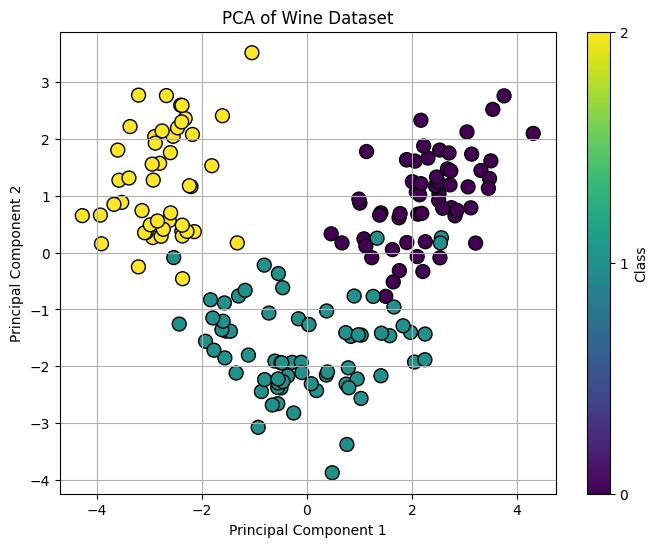

Explained variance ratio for each principal component: [0.36198848 0.1920749 ]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data  # Features
y = wine.target  # Target labels

# Print original shape and feature count
print("Original shape:", X.shape)
print("Number of features:", X.shape[1])

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_standardized)

# Function to plot PCA results
def plot_pca_results(X_pca, y):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
    plt.title('PCA of Wine Dataset')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter, ticks=range(len(np.unique(y))), label='Class')
    plt.xticks()
    plt.yticks()
    plt.grid()
    plt.show()

# Visualize the PCA results
plot_pca_results(X_pca, y)

# Explained variance ratio
print("Explained variance ratio for each principal component:", pca.explained_variance_ratio_)


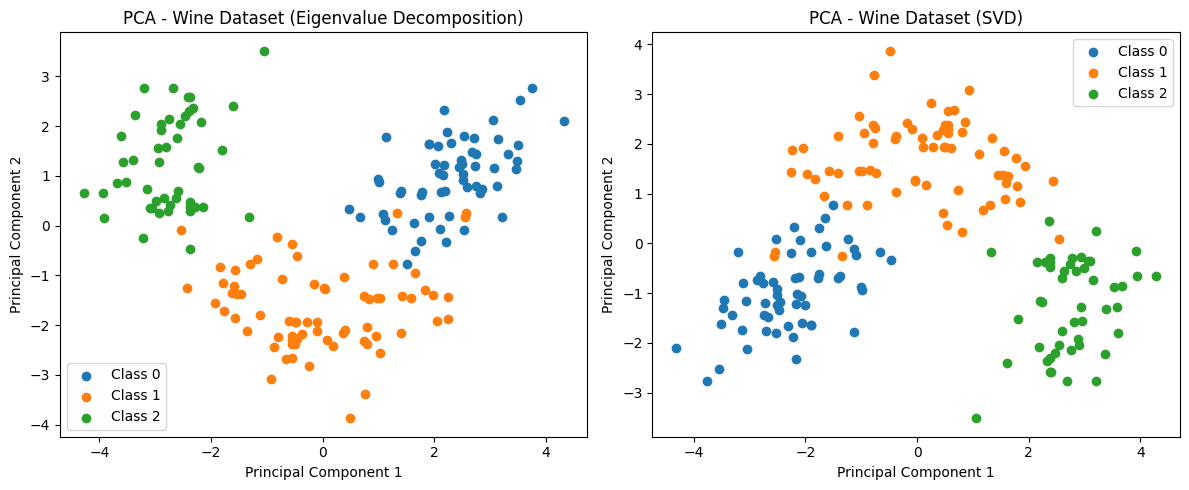

In [3]:
# Load the Wine dataset
wine_data = datasets.load_wine()
X_wine = wine_data.data
y_wine = wine_data.target

# Standardize the data
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

# Perform PCA using Eigenvalue Decomposition
pca_eigen_wine = PCA(n_components=2)
X_pca_eigen_wine = pca_eigen_wine.fit_transform(X_wine_scaled)

# Perform PCA using SVD
U_wine, S_wine, Vt_wine = np.linalg.svd(X_wine_scaled)
X_pca_svd_wine = U_wine[:, :2] * S_wine[:2]  # Project onto the first two components

# Plot the results for Eigenvalue Decomposition
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for label in np.unique(y_wine):
    plt.scatter(X_pca_eigen_wine[y_wine == label, 0], X_pca_eigen_wine[y_wine == label, 1], label=f'Class {label}')
plt.title('PCA - Wine Dataset (Eigenvalue Decomposition)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot the results for SVD
plt.subplot(1, 2, 2)
for label in np.unique(y_wine):
    plt.scatter(X_pca_svd_wine[y_wine == label, 0], X_pca_svd_wine[y_wine == label, 1], label=f'Class {label}')
plt.title('PCA - Wine Dataset (SVD)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.weights_ih = np.random.randn(self.input_size, self.hidden_size)
        self.bias_h = np.zeros((1, self.hidden_size))
        self.weights_ho = np.random.randn(self.hidden_size, self.output_size)
        self.bias_o = np.zeros((1, self.output_size))
    
    def forward(self, X):
        self.hidden = sigmoid(np.dot(X, self.weights_ih) + self.bias_h)
        self.output = sigmoid(np.dot(self.hidden, self.weights_ho) + self.bias_o)
        return self.output
    
    def backward(self, X, y, output, learning_rate):
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)
        
        hidden_error = np.dot(output_delta, self.weights_ho.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)
        
        self.weights_ho += learning_rate * np.dot(self.hidden.T, output_delta)
        self.bias_o += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_ih += learning_rate * np.dot(X.T, hidden_delta)
        self.bias_h += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)
    
    def train(self, X, y, epochs, learning_rate):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)
    
    def predict(self, X):
        return np.round(self.forward(X))

# XOR gate inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create and train the MLP
mlp = MLP(input_size=2, hidden_size=4, output_size=1)
mlp.train(X, y, epochs=10000, learning_rate=0.1)

# Test the MLP
print("XOR Gate Predictions:")
for input_val, true_output in zip(X, y):
    prediction = mlp.predict(input_val.reshape(1, -1))
    print(f"Input: {input_val}, True Output: {true_output[0]}, Predicted Output: {prediction[0][0]}")

XOR Gate Predictions:
Input: [0 0], True Output: 0, Predicted Output: 0.0
Input: [0 1], True Output: 1, Predicted Output: 1.0
Input: [1 0], True Output: 1, Predicted Output: 1.0
Input: [1 1], True Output: 0, Predicted Output: 0.0
